# Installing dependencies, imports, config and helpers

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Plotly for the map (later)
try:
    import plotly.express as px
except Exception:
    px = None

pd.set_option("display.max_columns", 50)


DATA_PATH =r'C:\Users\Vanisa\Downloads\owid-covid-data.csv'

# Countries I am focusing on
COUNTRIES = ["Kenya", "United States", "India"]

# Number of top countries to show in bar charts
TOP_N = 10

# === PLOTTING HELPERS ===
def plot_lines(df_in, y, title):
    """Line plot for selected countries over time."""
    plt.figure()
    for loc, g in df_in.groupby("location"):
        series = g[[ "date", y ]].dropna()
        if not series.empty:
            plt.plot(series["date"], series[y], label=loc)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(y.replace("_"," ").title())
    plt.legend()
    plt.tight_layout()
    plt.show()

def barh_top(df_in, value_col, label_col="location", title=""):
    plt.figure()
    # reverse for largest on top
    plt.barh(df_in[label_col][::-1], df_in[value_col][::-1])
    plt.title(title)
    plt.xlabel(value_col.replace("_"," ").title())
    plt.ylabel(label_col.title())
    plt.tight_layout()
    plt.show()


# 2. Load the dataset and Quick look through

In [6]:
df = pd.read_csv(DATA_PATH, low_memory=False)

print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
display(df.head())

# --- Missing values summary (top 25) ---
missing_summary = df.isnull().sum().sort_values(ascending=False).head(25)
display(missing_summary)

Shape: (350085, 67)

Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_va

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


weekly_icu_admissions                      339880
weekly_icu_admissions_per_million          339880
excess_mortality                           337901
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality_cumulative_per_million    337901
weekly_hosp_admissions                     326832
weekly_hosp_admissions_per_million         326832
icu_patients_per_million                   312470
icu_patients                               312470
hosp_patients_per_million                  311183
hosp_patients                              311183
total_boosters_per_hundred                 302523
total_boosters                             302523
new_vaccinations                           284739
people_fully_vaccinated_per_hundred        277510
people_fully_vaccinated                    277510
new_tests                                  274682
new_tests_per_thousand                     274682
people_vaccinated_per_hundred              274174


# 3. Basic cleaning and subset for selected countries.

In [7]:
# Ensure date is datetime and sort
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"]).sort_values(["location", "date"])

# Keep only real countries (exclude aggregates like 'World', 'Africa', etc.)
# In OWID, real countries have 3-letter ISO codes
df_countries = df[df["iso_code"].astype(str).str.len() == 3].copy()

# Filter countries of interest
df_sel = df_countries[df_countries["location"].isin(COUNTRIES)].copy()

# Forward-fill numeric columns within each country (reasonable for cumulative series)
numeric_cols = df_sel.select_dtypes("number").columns
df_sel[numeric_cols] = df_sel.groupby("location")[numeric_cols].ffill()

print("Selected subset shape:", df_sel.shape)
display(df_sel.head())


Selected subset shape: (4160, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
139773,IND,Asia,India,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139774,IND,Asia,India,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139775,IND,Asia,India,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139776,IND,Asia,India,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139777,IND,Asia,India,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


# 4. EDA — trends over time (cases, deaths, new cases, death rate)

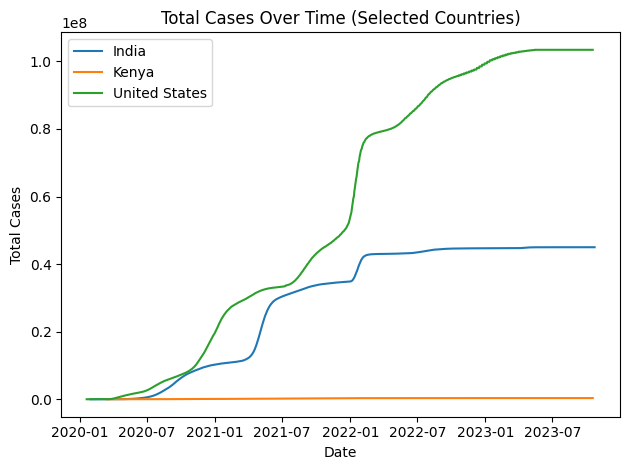

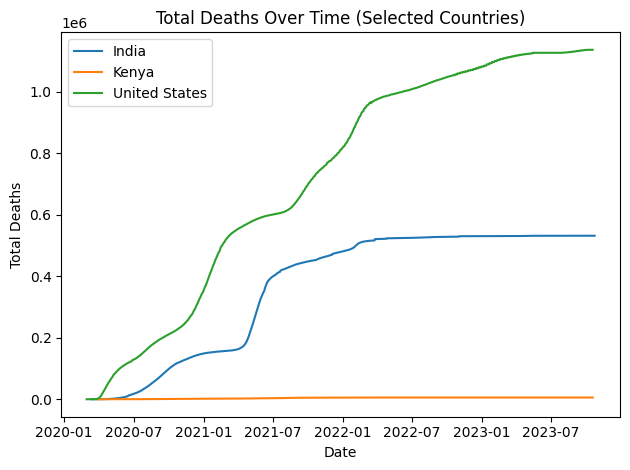

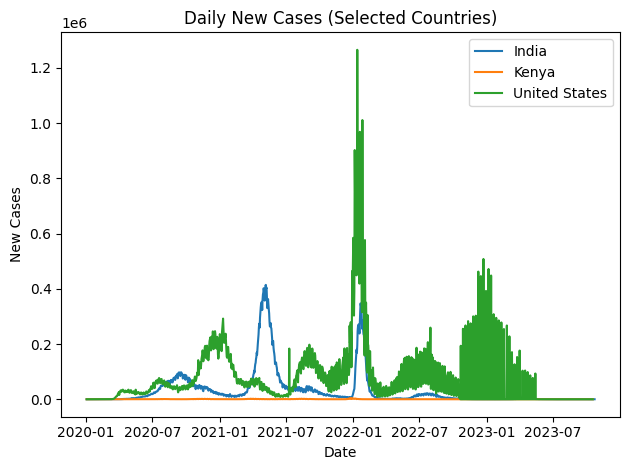

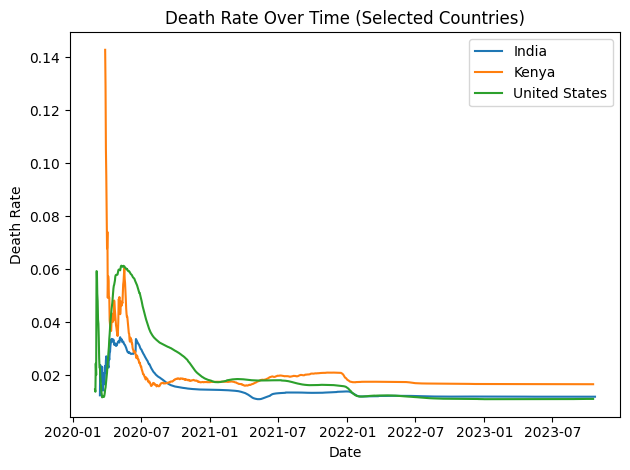

In [8]:
# Check which key columns exist before plotting
cols_needed = ["total_cases","total_deaths","new_cases"]
present = {c: (c in df_sel.columns) for c in cols_needed}
present

# Total cases over time
if present["total_cases"]:
    plot_lines(df_sel, "total_cases", "Total Cases Over Time (Selected Countries)")

# Total deaths over time
if present["total_deaths"]:
    plot_lines(df_sel, "total_deaths", "Total Deaths Over Time (Selected Countries)")

# Daily new cases
if present["new_cases"]:
    plot_lines(df_sel, "new_cases", "Daily New Cases (Selected Countries)")

# Death rate over time
if all(c in df_sel.columns for c in ["total_deaths","total_cases"]):
    df_sel = df_sel.copy()
    df_sel["death_rate"] = (df_sel["total_deaths"] / df_sel["total_cases"]).clip(lower=0, upper=1)
    plot_lines(df_sel, "death_rate", "Death Rate Over Time (Selected Countries)")


# 5. snapshot: top countries by total cases (latest date)

,location,iso_code,continent,population,total_cases,total_deaths,people_fully_vaccinated
330865,United States,USA,North America,3.382899e+08,103436829.0,1136920.0,NaN
62346,China,CHN,Asia,1.425887e+09,99315684.0,121742.0,NaN
106599,France,FRA,Europe,6.781300e+07,38997490.0,167985.0,NaN
114909,Germany,DEU,Europe,8.336984e+07,38437756.0,174979.0,NaN
42951,Brazil,BRA,South America,2.153135e+08,37721749.0,704659.0,NaN
293501,South Korea,KOR,Asia,5.181581e+07,34571873.0,35934.0,NaN
153631,Japan,JPN,Asia,1.239517e+08,33803572.0,74694.0,NaN
329480,United Kingdom,GBR,Europe,6.750894e+07,24779150.0,230383.0,NaN
257566,Russia,RUS,Europe,1.447133e+08,23061960.0,400102.0,NaN
319785,Turkey,TUR,Asia,8.534125e+07,17004677.0,101419.0,NaN


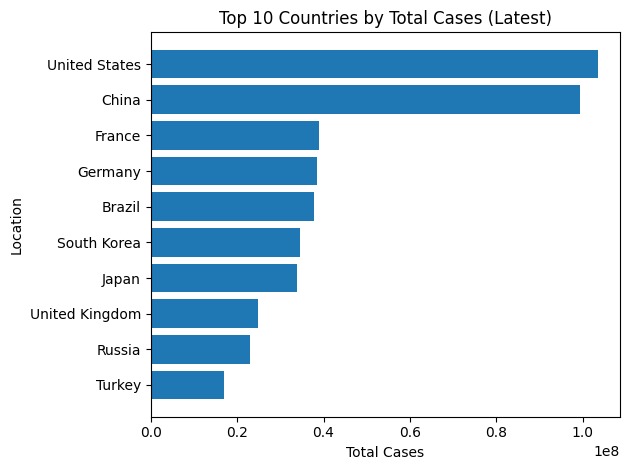

In [9]:
latest_by_country = (
    df_countries.sort_values("date")
    .groupby("location", as_index=False)
    .tail(1)[["location", "iso_code", "continent", "population",
              "total_cases", "total_deaths", "people_fully_vaccinated"]]
    .sort_values("total_cases", ascending=False)
)

display(latest_by_country.head(10))

# Bar chart for top N countries by total cases
top_cases = latest_by_country.head(TOP_N)
barh_top(top_cases, "total_cases", title=f"Top {TOP_N} Countries by Total Cases (Latest)")


# 6. Vaccination progress - levels and % of population

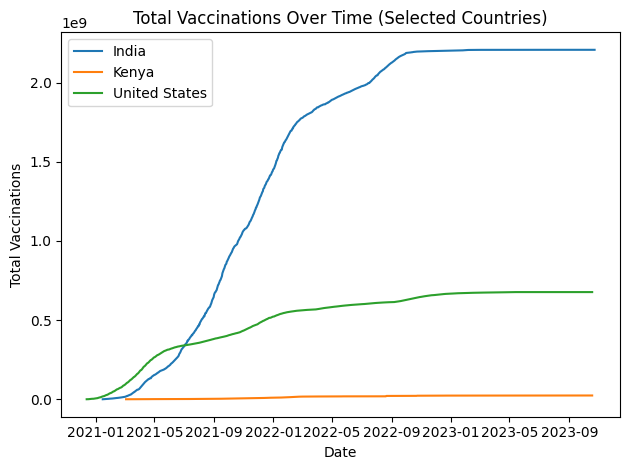

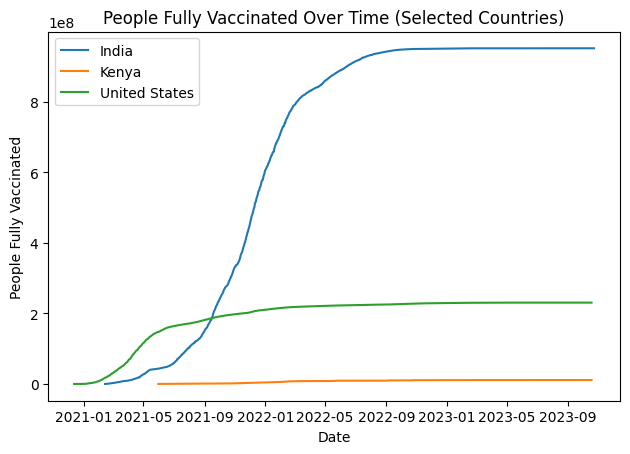

,location,people_fully_vaccinated,population,pct_fully
180751,Macao,642266.0,6.951800e+05,92.388446
137002,Hong Kong,6801365.0,7.488863e+06,90.819728
305935,Taiwan,20793089.0,2.389340e+07,87.024419
335030,Uruguay,2903059.0,3.422796e+06,84.815426
26331,Bangladesh,142193276.0,1.711864e+08,83.063434
150861,Italy,47949615.0,5.903747e+07,81.218950
184909,Malaysia,27529147.0,3.393822e+07,81.115481
16629,Aruba,84344.0,1.064590e+05,79.226745
13854,Argentina,34897769.0,4.551032e+07,76.680994
119068,Greece,7646615.0,1.038497e+07,73.631542


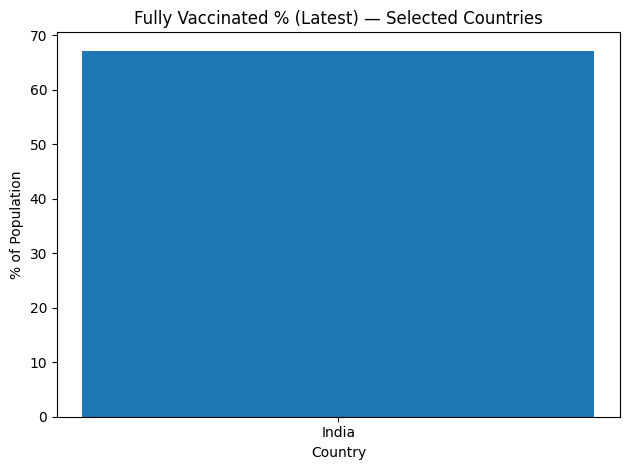

In [10]:
# Lines for cumulative vaccinations in selected countries (if columns exist)
for col, label in [("total_vaccinations", "Total Vaccinations"),
                   ("people_fully_vaccinated", "People Fully Vaccinated")]:
    if col in df_sel.columns:
        plot_lines(df_sel, col, f"{label} Over Time (Selected Countries)")
    else:
        print(f"Column '{col}' not found. Skipping.")

# Latest % fully vaccinated by country
if {"people_fully_vaccinated","population"}.issubset(df_countries.columns):
    latest_vax = (
        df_countries.sort_values("date")
        .groupby("location", as_index=False)
        .tail(1)[["location","people_fully_vaccinated","population"]]
        .dropna(subset=["population"])
        .assign(pct_fully=lambda d: (d["people_fully_vaccinated"] / d["population"]) * 100)
        .sort_values("pct_fully", ascending=False)
    )
    display(latest_vax.head(15))

    # Bar for your selected countries
    vax_sel = latest_vax[latest_vax["location"].isin(COUNTRIES)]
    if not vax_sel.empty:
        plt.figure()
        plt.bar(vax_sel["location"], vax_sel["pct_fully"])
        plt.title("Fully Vaccinated % (Latest) — Selected Countries")
        plt.ylabel("% of Population")
        plt.xlabel("Country")
        plt.tight_layout()
        plt.show()
else:
    print("`people_fully_vaccinated` and/or `population` columns missing.")


# 8. Insights and Reporting

Let me come back to this later, It is the weekend and I am so so 😴 